<a href="https://colab.research.google.com/github/sahil-kishor/Web-Scraping-Project/blob/main/Final_Solution_of_Numerical_Programming_in_Python_Web_Scraping_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Web Scrapping Project**

## **Scrapping Job Listings from TimesJob**



---



In [ ]:
# Importing necessary libraries
import numpy as np                # NumPy for numerical operations
import pandas as pd               # Pandas for data manipulation
import seaborn as sns             # Seaborn for statistical data visualization
import matplotlib.pyplot as plt   # Matplotlib for plotting
from bs4 import BeautifulSoup     # BeautifulSoup for web scraping
import requests                   # Requests for handling HTTP requests
from wordcloud import WordCloud   # WordCloud for creating word clouds
import warnings                   # Warnings for controlling display of warnings

# Ignoring warnings during execution
warnings.filterwarnings('ignore')

In [ ]:
def extract_salary(job_element):
  # Find all 'li' tags within the job_element
    salary_tags = job_element.find_all('li')

     # Iterate through each 'li' tag
    for tag in salary_tags:
        if 'Lacs' in tag.text:    # Check if the text of the tag contains 'Lacs'
            return tag.text.strip().replace('₹Rs','').replace('Lacs p.a.','')
            # If found, return the cleaned and formatted salary information
    # If no salary information is found, return 'Not Provided'
    return 'Not Provided'

In [ ]:
def scrape_jobs(pages):
  # Initialize empty lists to store scraped data
    all_data = []
    experience_required_list = []

  # Loop through specified number of pages
    for page in range(1, pages + 1):
      # Choosing Times_Job platform as Source
       # Construct the URL for the job search page
        url = f'https://www.timesjobs.com/candidate/job-search.html?from=submit&luceneResultSize=25&txtKeywords=0DQT0Data%20Analyst0DQT0%20,0DQT0Data%20Mining0DQT0,0DQT0Data%20Architect0DQT0,0DQT0Machine%20Learning0DQT0,0DQT0Power%20Bi0DQT0,0DQT0Business%20Analyst0DQT0,0DQT0senior%20business%20analyst0DQT0,0DQT0Bi%20Developer0DQT0&postWeek=7&searchType=personalizedSearch&actualTxtKeywords=0DQT0Data%20Analyst0DQT0%20,0DQT0Data%20Mining0DQT0,0DQT0Data%20Architect0DQT0,0DQT0Machine%20Learning0DQT0,0DQT0Power%20Bi0DQT0,0DQT0Business%20Analyst0DQT0,senior%20business%20analyst,0DQT0Bi%20Developer0DQT0&searchBy=0&rdoOperator=OR&pDate=I&sequence={page}&startPage=1'
        html_text = requests.get(url).text
        soup = BeautifulSoup(html_text, 'lxml')

      # Extract experience information
        for item in soup.find_all('ul', {'class': 'top-jd-dtl clearfix'}):
            exp_tag = item.find('li')
            if exp_tag and 'yrs' in exp_tag.text:
                experience = exp_tag.text.replace('card_travel', '').strip().replace('yrs','')
                experience_required_list.append(experience)
            else:
                experience_required_list.append('Does not Exists')

       # Extract job listings
        job_listings = soup.find_all('li', class_='clearfix job-bx wht-shd-bx')

       # Iterate through each job listing
        for job in job_listings:
         # Extract various details from the job listing
            skills = job.find('span', class_='srp-skills').text.strip().replace(' ', '').replace('\r', '').replace('\n', '').replace('.', 'Does not Exists')
            location_element = job.find('ul', class_='top-jd-dtl clearfix')
            location = location_element.find('span').text.strip() if location_element else 'Does not Exists'
            posted_ago = job.find('span', class_='sim-posted').span.text.strip().replace('\r', '').replace('Posted ', '').replace('\t', '').replace('\n', '')
            company_name = job.find('h3', class_='joblist-comp-name').text.strip().replace('\r', '').replace('\n', '').replace(' (More Jobs)', '')

            # Create a dictionary for each job and append to the list
            job_data = {
                'Job Title': job.find('h2').text.strip(),
                'Company': company_name,
                'Skills Required': skills,
                'Job Posted Ago': posted_ago,
                'Location': location,
                'Salary(Lacs p.a.)': extract_salary(job)
            }
            all_data.append(job_data)

    # Create a DataFrame from the collected data
    df = pd.DataFrame(all_data)
    df['Experience Required(Years)'] = experience_required_list

    return df    # Return the DataFrame

# Call the scrape_jobs function with 10 pages and store the result in the 'df' variable
df = scrape_jobs(10)

In [ ]:
# Display the first 100 rows of the DataFrame
print('Scraped Data from Multiple Pages:')
df.head(100)

Scraped Data from Multiple Pages:


,Job Title,Company,Skills Required,Job Posted Ago,Location,Salary(Lacs p.a.),Experience Required(Years)
0,Power BI Developer,Alpha Tech,"AzureAnalysisServices,AmazonAws,Devops,Jenkins...",2 days ago,"Bengaluru / Bangalore, Chennai, Hyderabad/Se...",4.50 - 7.50,0 - 1
1,"Data Analyst , Data Analyst / Modeler , Busine...",Prime immigration llp,"BusinessAnalysis,LeadGeneration,MarketResearch...",1 day ago,"Dubai, Australia, Canada, Germany",Not Provided,5 - 10
2,"audit manager , Associate Consultant , Associa...",Prime immigration llp,"BusinessAnalyst,seniorbusinessanalyst,systeman...",1 day ago,"Australia, Canada, Germany, Hong Kong, Sin...",Not Provided,5 - 10
3,Senior Business Analyst / Data Engineer - Pyth...,New Global Technologies,"CloudComputing,Saas,DataBaseAdministration,bus...",2 days ago,"Bengaluru / Bangalore, Delhi/NCR, Hyderabad/...",4.00 - 14.00,1 - 6
4,Urgent opening in Canada / Australia / Mal...,Uprooting Advisor's,"Salesmanagers,Marketing,softwareengineer,senio...",2 days ago,"New York City, Australia, Canada, New Zeala...",11.30 - 22.40,1 - 6
...,...,...,...,...,...,...,...
95,SOFTWARE ENGINEER I,TE Connectivity Ltd,"datamanagement,r/python/spark,machinelearning,...",4 days ago,Bengaluru / Bangalore,Not Provided,3 - 5
96,"Data Analyst-Processing Mining , Ind , Blr Grp...",ANZ GRINDLAYS BANK,"dataanalysis,processmining,automation,business...",4 days ago,Bengaluru / Bangalore,Not Provided,5 - 9
97,"Data Analyst-Processing Mining , Ind , Blr Grp...",ANZ GRINDLAYS BANK,"dataanalysis,processmining,automation,business...",4 days ago,Bengaluru / Bangalore,Not Provided,5 - 9
98,Data Analysts,kudosindia,"testcases,database,metrics,componenttesting",3 days ago,Mumbai,Not Provided,0 - 3


# **Data Analysis of the Scrapped Data**

In [ ]:
# Display the summary of the Scrapped Data
print('Info:')
df.info()

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Job Title                   250 non-null    object
 1   Company                     250 non-null    object
 2   Skills Required             250 non-null    object
 3   Job Posted Ago              250 non-null    object
 4   Location                    250 non-null    object
 5   Salary(Lacs p.a.)           250 non-null    object
 6   Experience Required(Years)  250 non-null    object
dtypes: object(7)
memory usage: 13.8+ KB


In [ ]:
# Counting the total number of rows and columns in the data
print('Total number of rows:',df.shape[0])
print('Total  number of columns:',df.shape[1])

Total number of rows: 250
Total  number of columns: 7


In [ ]:
# Display the names of all the columns on which information are based
print('Scrapped Columns:',df.columns,sep='\n',end='\n\n')

Scrapped Columns:
Index(['Job Title', 'Company', 'Skills Required', 'Job Posted Ago', 'Location',
       'Salary(Lacs p.a.)', 'Experience Required(Years)'],
      dtype='object')



In [ ]:
df.describe(include='object')

,Job Title,Company,Skills Required,Job Posted Ago,Location,Salary(Lacs p.a.),Experience Required(Years)
count,250,250,250,250,250,250,250
unique,170,122,204,7,63,24,55
top,Business Analyst,Cotocus,Does not Exists,6 days ago,Bengaluru / Bangalore,Not Provided,2 - 5
freq,27,12,7,55,70,223,29


# **Insights here are Removing Duplicates and NULL values with respective functions**

In [ ]:
# Removing duplicates

print('Before Removing Duplicates:')
print('Dataset Rows count:',df.shape[0])
print('Dataset Columns count:',df.shape[1],end='\n\n')
df.drop_duplicates(inplace=True)
print('After Removing Duplicates:')
print('Dataset Rows count:',df.shape[0])
print('Dataset Columns count:',df.shape[1])

Before Removing Duplicates:
Dataset Rows count: 250
Dataset Columns count: 7

After Removing Duplicates:
Dataset Rows count: 214
Dataset Columns count: 7


In [ ]:
# Dropping NULL values

print('Before Removing Missing Values:')
print('Dataset Rows count:',df.shape[0])
print('Dataset Columns count:',df.shape[1],end='\n\n')
df['Location'].replace('', pd.NA, inplace=True)
df.dropna(subset=['Location'], inplace=True)
print('After Removing Missing Values:')
print('Dataset Rows count:',df.shape[0])
print('Dataset Columns count:',df.shape[1])

Before Removing Missing Values:
Dataset Rows count: 214
Dataset Columns count: 7

After Removing Missing Values:
Dataset Rows count: 208
Dataset Columns count: 7


In [ ]:
# Checking over Data Quality after Data Cleaning and Wrangling
print('Missing or bad data after data wrangling and cleaning:')
df.isnull().sum()

Missing or bad data after data wrangling and cleaning:


Job Title                     0
Company                       0
Skills Required               0
Job Posted Ago                0
Location                      0
Salary(Lacs p.a.)             0
Experience Required(Years)    0
dtype: int64

# Visualizing **Data** with the help of wordcloud to help find the most used terms

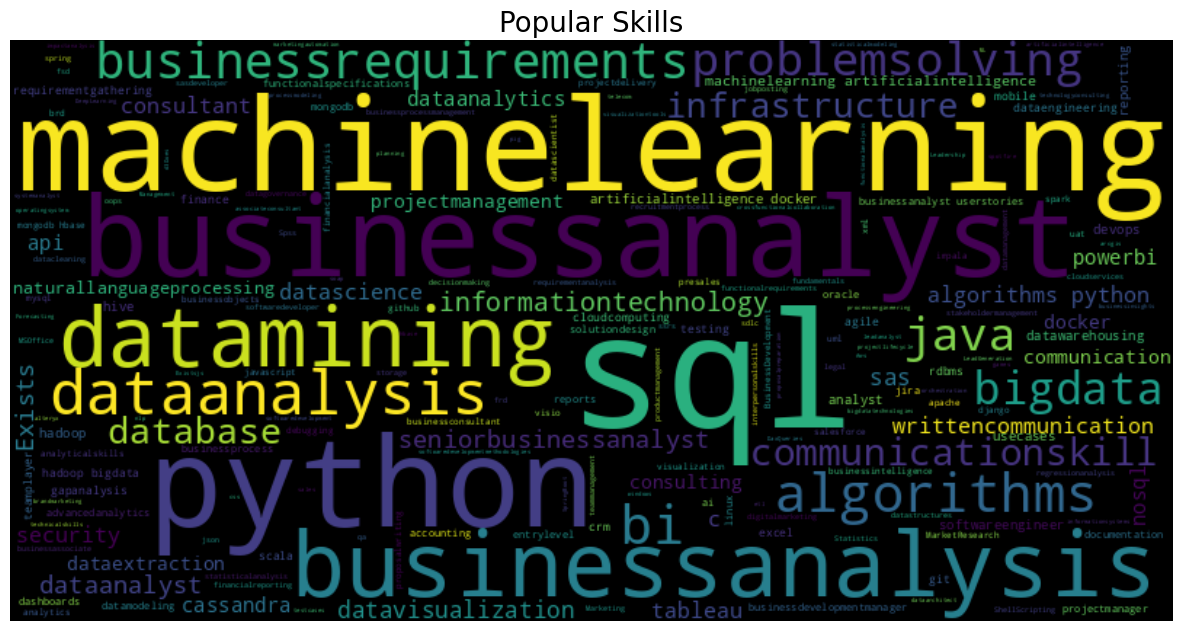

In [ ]:
# Concatenate all the skills in the 'Skills Required' column into a single string
text3 = ' '.join(df['Skills Required'].values)
# Generate a WordCloud with specified parameters
wordcloud2 = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(text3)
plt.figure(figsize=(15, 15))
plt.title("Popular Skills", fontsize=20)
plt.imshow(wordcloud2, interpolation="bilinear")
plt.axis("off")
plt.show()


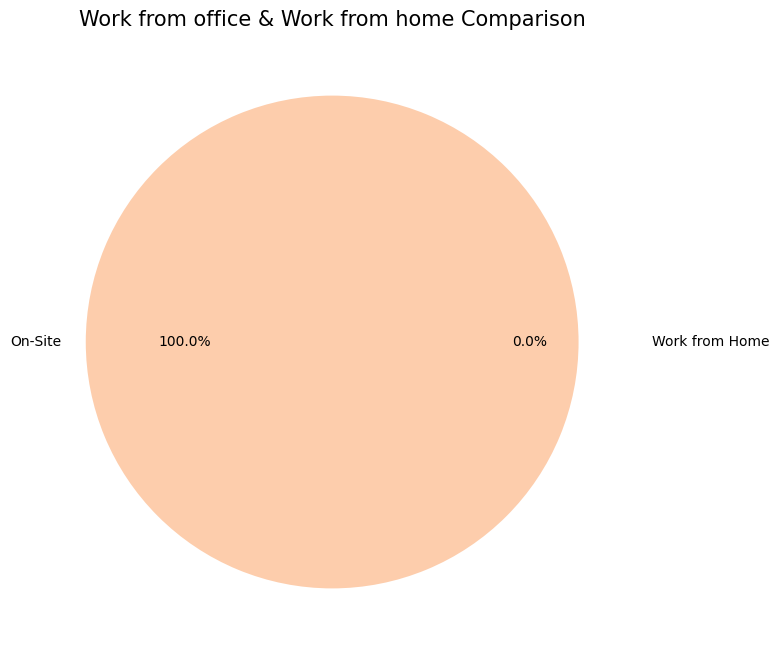

In [ ]:
categories = ['Work from Home', 'On-Site']
counts = [df[df['Job Posted Ago'].str.contains('WFH', case=False)].shape[0],
          df.shape[0] - df[df['Job Posted Ago'].str.contains('WFH', case=False)].shape[0]]
explode = (0.2, 0)
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=categories, autopct='%1.1f%%', colors=sns.color_palette('Pastel2'), explode=explode)
plt.title('Work from office & Work from home Comparison',fontsize=15)
plt.show()

# As inferred from the pie chart below, work from home is not present as an option of working mode currently

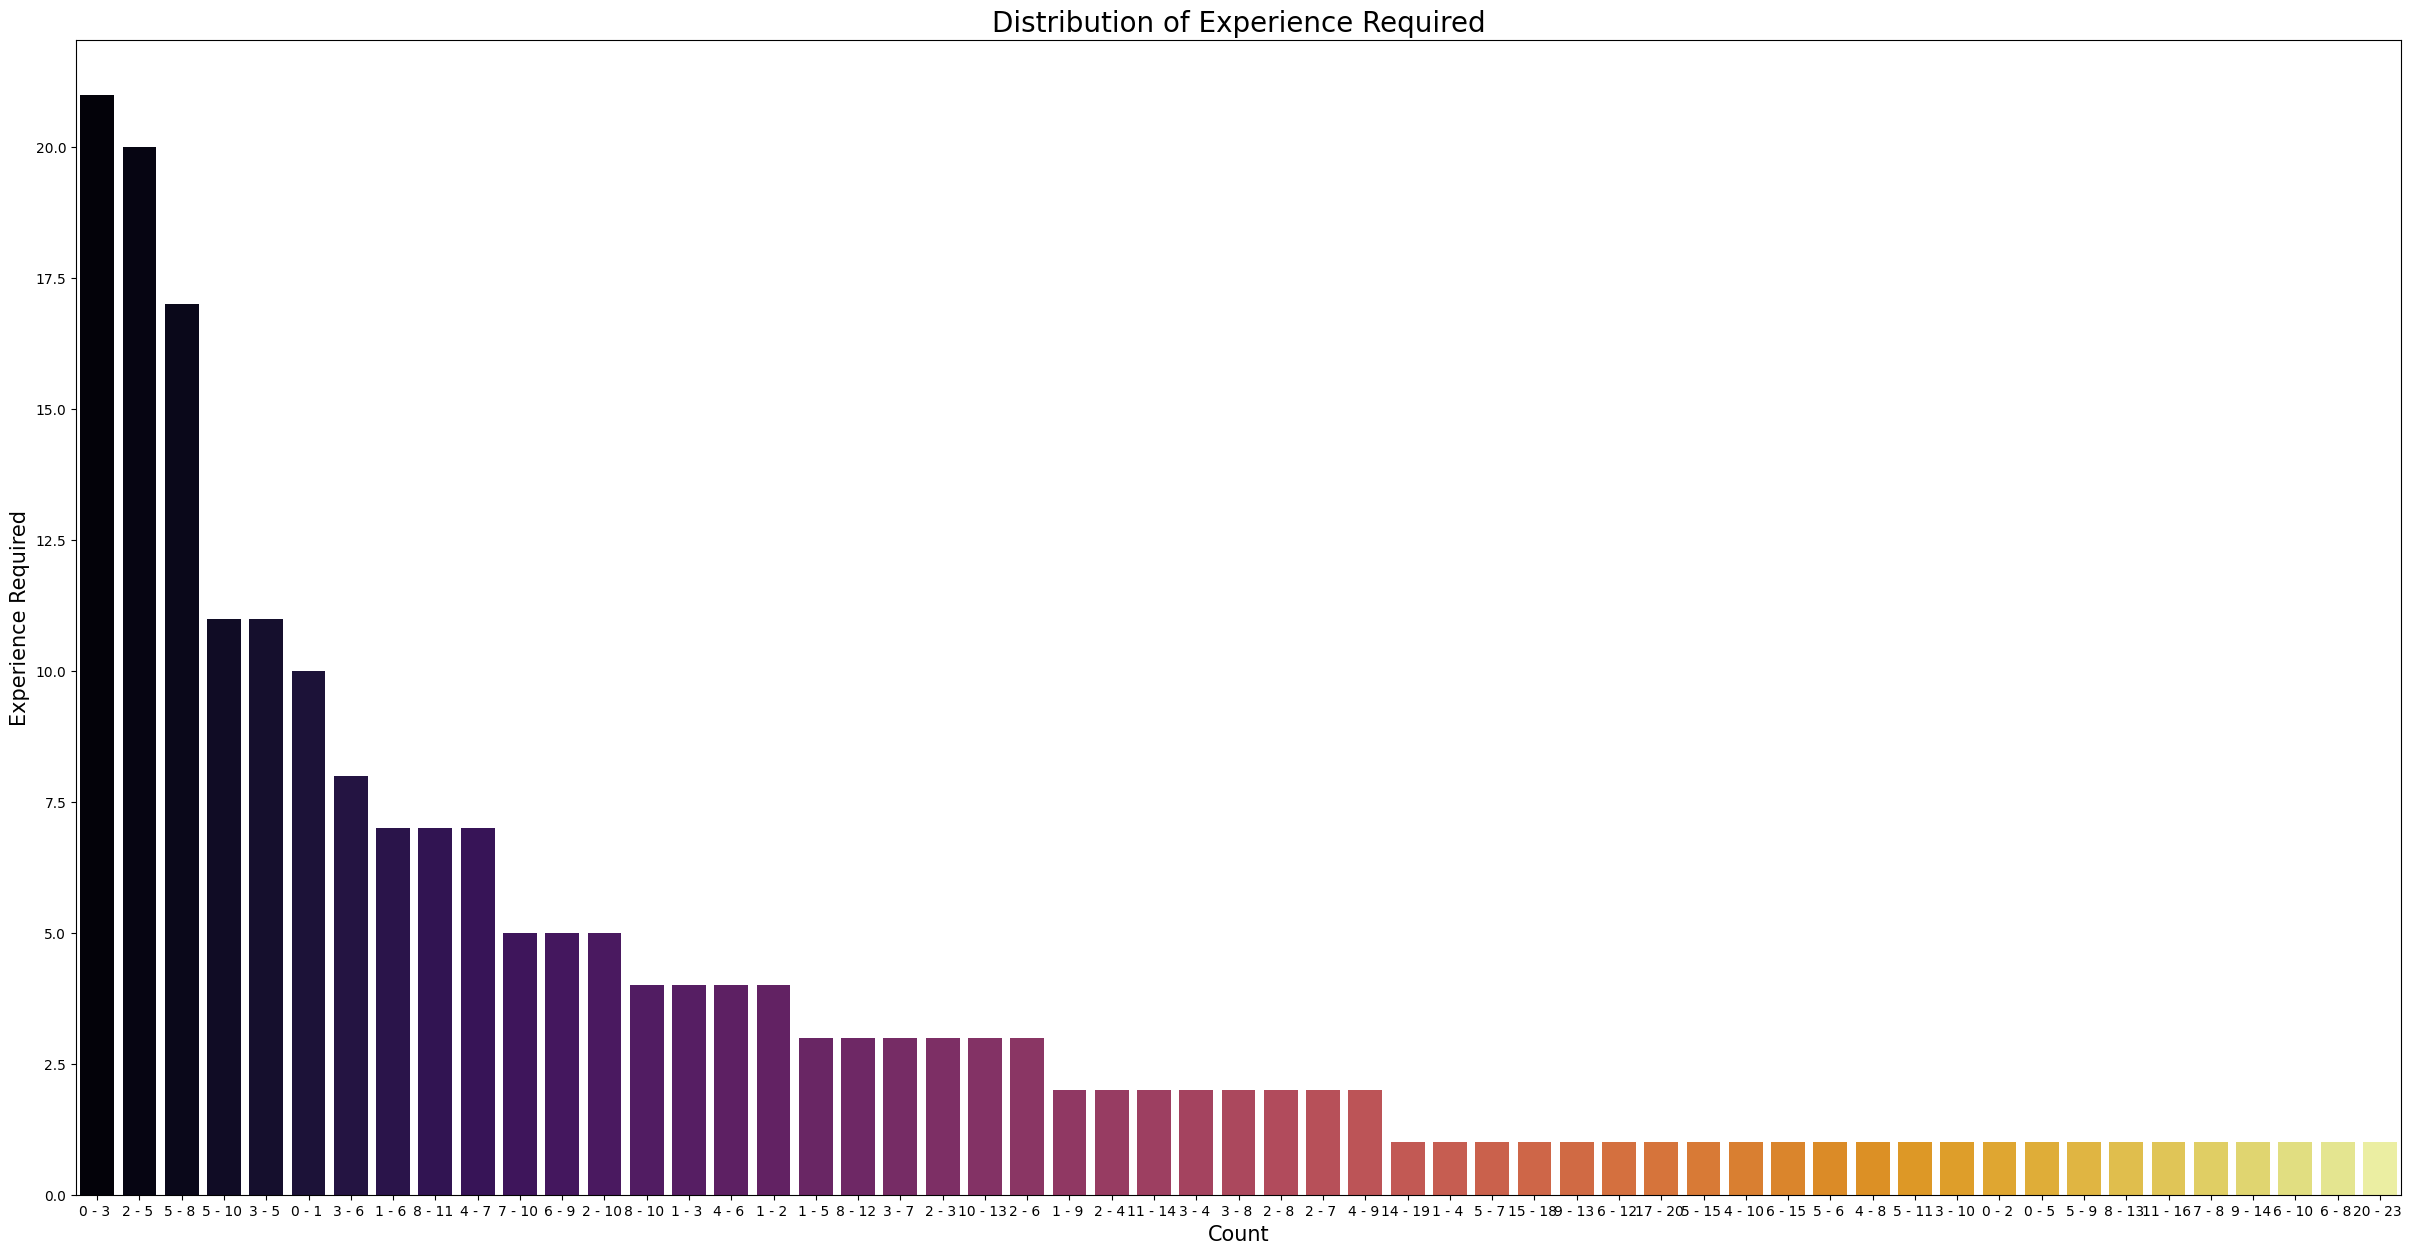

In [ ]:
experience_counts = df['Experience Required(Years)'].value_counts()
plt.figure(figsize=(30, 15))
sns.barplot(x=experience_counts.index, y=experience_counts, palette='inferno')
plt.title('Distribution of Experience Required',fontsize=20)
plt.xlabel('Count',fontsize=15)
plt.ylabel('Experience Required',fontsize=15)
plt.show()

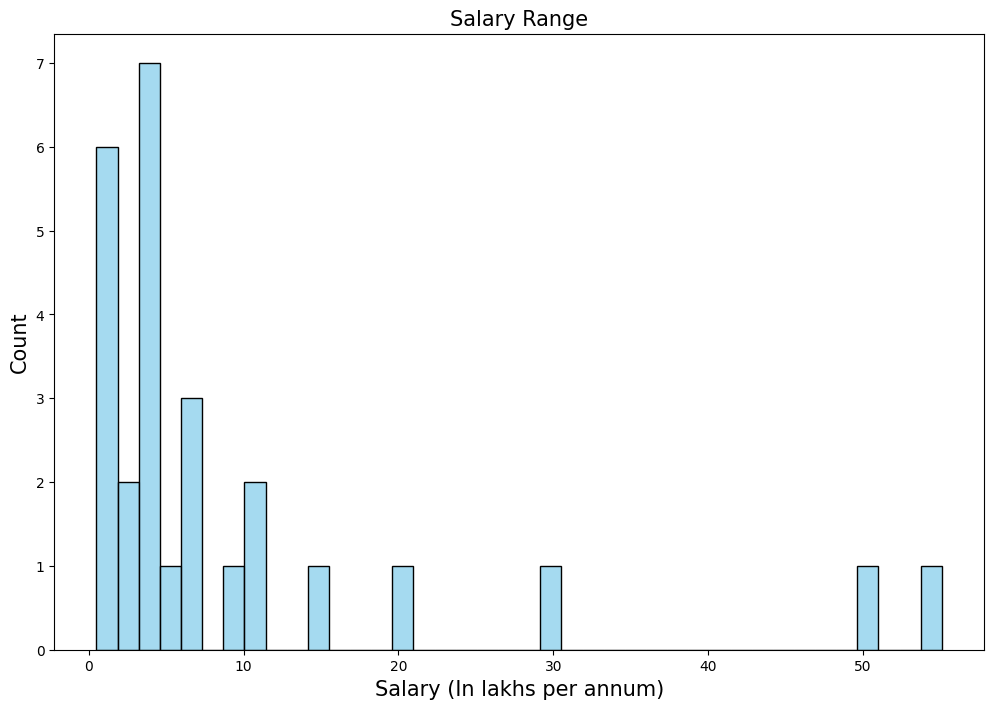

In [ ]:
# calculating the salary range of the individuals to interpret the salary trend amongst the highest paying jobs

df_salary = df[df['Salary(Lacs p.a.)'] != 'Not Provided'].copy()
df_salary['Salary(Lacs p.a.)'] = df_salary['Salary(Lacs p.a.)'].str.extract(r'([\d.]+)')
df_salary['Salary(Lacs p.a.)'] = df_salary['Salary(Lacs p.a.)'].astype(float)
plt.figure(figsize=(12, 8))
sns.histplot(df_salary['Salary(Lacs p.a.)'], bins=40, kde=False, color='skyblue')
plt.title('Salary Range',fontsize=15)
plt.xlabel('Salary (In lakhs per annum)',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

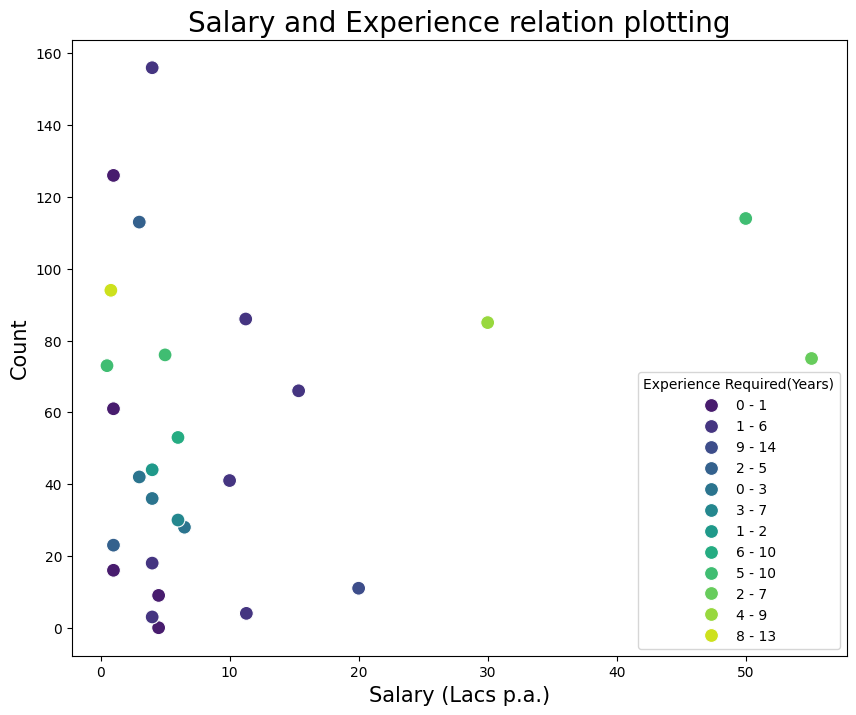

In [ ]:
# Trying to find the relation between experience required for higher paying jobs and the salaries

plt.figure(figsize=(10, 8))
sns.scatterplot(x='Salary(Lacs p.a.)', y=df_salary.index, hue='Experience Required(Years)', data=df_salary, palette='viridis', s=100)
plt.title('Salary and Experience relation plotting',fontsize=20)
plt.xlabel('Salary (Lacs p.a.)',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

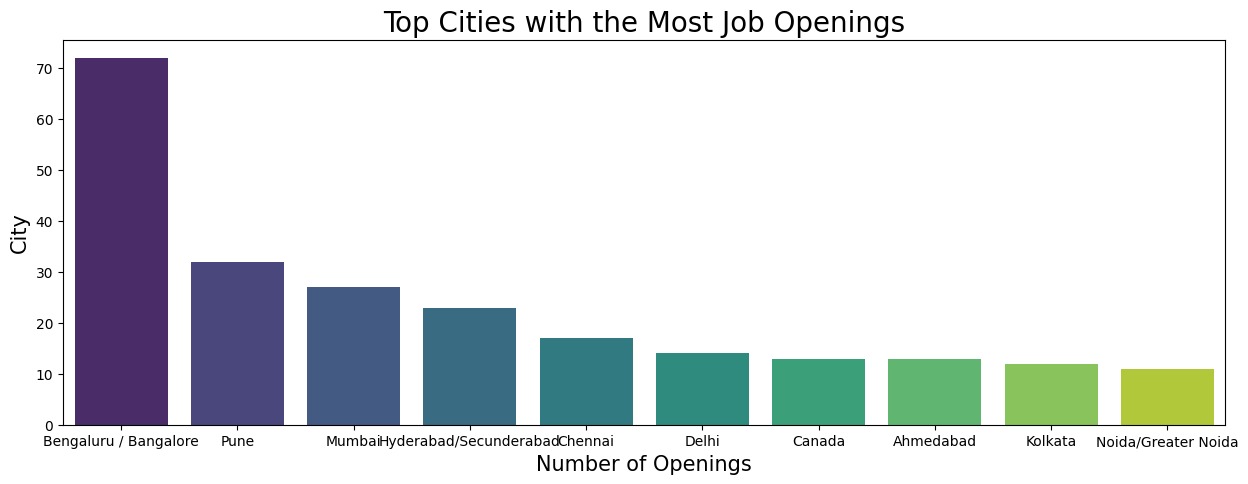

In [ ]:
# I used this chart to get an insight vizually of the cities providing the most job opportunities with the help of the seaborn library

cities = df['Location'].apply(lambda x: x.split(','))
flat_cities = [city.strip() for sublist in cities for city in sublist]
city_counts = pd.Series(flat_cities).value_counts().reset_index()
city_counts.columns = ['City', 'Count']
top_cities = city_counts.head(10)
plt.figure(figsize=(15, 5))
sns.barplot(x='City', y='Count' ,data=top_cities, palette='viridis')
plt.xlabel('Number of Openings',fontsize=15)
plt.ylabel('City',fontsize=15)
plt.title('Top Cities with the Most Job Openings',fontsize=20)
plt.show()



---


### **Conclusion :**

**The culmination of our data scraping project, focused on extracting and analyzing information from a diverse online source TimesJobs, has yielded significant insights and added substantial value to our understanding of the subject matter.Through the meticulous application of data wrangling techniques and the creation of informative visualizations, we have addressed key objectives and drawn noteworthy conclusions.**




---


### ***Key Findings :***



*   Patterns and Trends: This data analysis uncovered some unseen patterns and trends within the collected data. This has enhanced the comprehension of industry.
*   Data Quality Enhancement: The data wrangling process proved instrumental in addressing data quality issues. Through cleaning, transforming, and aggregating data, I have produced a more reliable dataset suitable for robust analysis.


*  Strategic Implications: The insights derived from our visualizations have strategic implications for users. These findings can inform decision-making processes, guide resource allocation, and contribute to the development of effective strategies.

*  User-Friendly Visualization: The creation of user-friendly dashboards and visualizations using specific tools has facilitated the communication of complex data-driven insights. This ensures that anyone, regardless of technical expertise, can easily grasp and leverage the findings.


---

